In [1]:
import numpy as np
import pandas as pd

import torch 
import torch.nn as nn
from torch.utils.data import Dataset

from sklearn.model_selection import train_test_split

from fastai.basics import *

In [3]:
df = pd.read_csv('Dataset_spine.csv')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [4]:
df = df.drop('Unnamed: 13',axis=1)
df['Class_att'] = df['Class_att'].astype('category')
encode_map = {
    'Abnormal': 1,
    'Normal': 0
}

df['Class_att'].replace(encode_map, inplace=True)

In [5]:
X = np.array(df.iloc[:, 0:-1]).astype(np.float64)
y = np.array(df.iloc[:, -1]).astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=69)

In [6]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        self.layer_1 = nn.Linear(12, 64) 
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.layer_out(x)
        x = self.sigmoid(x)
        
        return x

In [7]:
class TabularData(Dataset):
    def __init__(self, X, y):
        """
        Torch data Loader for experimental data

        X : array-like, shape (n_samples, n_features)
          The input data.

        y : array-like, shape (n_samples,)
          The target values (class labels in classification, real numbers in regression).
        """
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx, :], self.y[idx]

In [8]:
data_fastai = DataBunch.create(train_ds=TabularData(X_train,y_train), valid_ds=TabularData(X_valid, y_valid), test_ds = TabularData(X_test, y_test), bs=32)

In [15]:
fastai_nnet = Learner(data=data_fastai, model=binaryClassification().double(), loss_func=nn.BCELoss())
fastai_nnet.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,time
0,17.320559,17.324648,00:00


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch,train_loss,valid_loss,time
0,15.940472,#na#,00:00
1,15.830271,#na#,00:00
2,15.734547,#na#,00:00
3,15.758575,#na#,00:00
4,15.663231,#na#,00:00
5,15.621420,#na#,00:00
6,15.518510,#na#,00:00
7,15.170651,#na#,00:00
8,14.169590,#na#,00:00
9,12.311080,#na#,00:00


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


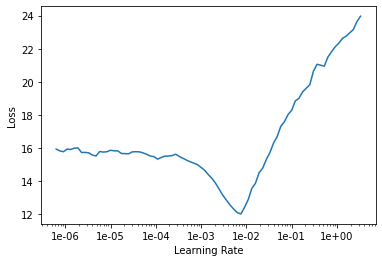

In [16]:
fastai_nnet.lr_find()
fastai_nnet.recorder.plot()

In [22]:
fastai_nnet.fit_one_cycle(4,1e-3)

epoch,train_loss,valid_loss,time
0,1.646144,1.221705,00:00
1,1.453965,1.130436,00:00
2,1.382016,1.039228,00:00
3,1.320071,1.003055,00:00


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


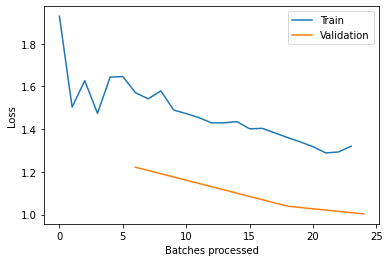

In [23]:
fastai_nnet.recorder.plot_losses()

In [24]:
fastai_nnet.save('init')